# Kinesis TSP Data Quality Assessment (SS, Oct 2021)

In [10]:
# Import libraries
import numpy as np
import pandas as pd
import datetime
import getpass
import psycopg2
import os
import json
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors
# from tqdm import tqdm
import seaborn as sns

# 1. Kinesis

In [3]:
# Define variables
data_path = '/Users/sven.sabas/projects/tsp-evaluation-framework/data/source/kinesis'
data_files = [os.path.join(data_path, file) for file in os.listdir(data_path) if file.endswith('.json')] 

In [4]:
data_files

['/Users/sven.sabas/projects/tsp-evaluation-framework/data/source/kinesis/zego-datadump.json']

In [31]:
# Pull the data
data_df = pd.concat([pd.read_json(file) for file in data_files], ignore_index = True)
data_df

,flags,ownerId,originId,type,linked,date,received,active,location,zones,routes,state,telemetry,io,spd,meta,assetId,assetName,assetTags
0,0,4e433a0f-5db3-4db9-9604-a4b39ea77e92,a392007d-b3f9-4f01-8a1a-4568773cf3b0,telemetry,[3124435e-c5b0-423e-add8-409444a3e15b],2021-08-18 13:43:18,2021/08/18 13:43:21,True,"{'lon': -8704650, 'lat': 191130948, 'speed': 1...",[],NaN,NaN,"{'priority': 0, 'eventId': 0, 'ignition': 1, '...",NaN,"{'rd': 30, 'mx': 30, 'un': 1}","{'dsid': 'deviceserver2@00315b7f7937', 'wshost...",3124435e-c5b0-423e-add8-409444a3e15b,Vehicle 5,[]
1,0,4e433a0f-5db3-4db9-9604-a4b39ea77e92,a392007d-b3f9-4f01-8a1a-4568773cf3b0,telemetry,[3124435e-c5b0-423e-add8-409444a3e15b],2021-08-18 13:43:48,2021/08/18 13:43:51,True,"{'lon': -8704686, 'lat': 191131151, 'speed': 0...",[],NaN,NaN,"{'priority': 0, 'eventId': 0, 'ignition': 1, '...",NaN,None,"{'dsid': 'deviceserver2@00315b7f7937', 'wshost...",3124435e-c5b0-423e-add8-409444a3e15b,Vehicle 5,[]
2,0,4e433a0f-5db3-4db9-9604-a4b39ea77e92,a392007d-b3f9-4f01-8a1a-4568773cf3b0,telemetry,[3124435e-c5b0-423e-add8-409444a3e15b],2021-08-18 13:43:57,2021/08/18 13:43:59,True,"{'lon': -8704686, 'lat': 191131151, 'speed': 0...",[],NaN,NaN,"{'priority': 0, 'eventId': 250, 'ignition': 1,...",NaN,None,"{'dsid': 'deviceserver2@00315b7f7937', 'wshost...",3124435e-c5b0-423e-add8-409444a3e15b,Vehicle 5,[]
3,0,4e433a0f-5db3-4db9-9604-a4b39ea77e92,a392007d-b3f9-4f01-8a1a-4568773cf3b0,telemetry,[3124435e-c5b0-423e-add8-409444a3e15b],2021-08-18 13:43:58,2021/08/18 13:44:00,False,"{'lon': -8704686, 'lat': 191131151, 'speed': 0...",[],NaN,NaN,"{'priority': 0, 'eventId': 239, 'ignition': 0,...",NaN,None,"{'dsid': 'deviceserver2@00315b7f7937', 'wshost...",3124435e-c5b0-423e-add8-409444a3e15b,Vehicle 5,[]
4,0,4e433a0f-5db3-4db9-9604-a4b39ea77e92,a392007d-b3f9-4f01-8a1a-4568773cf3b0,telemetry,[3124435e-c5b0-423e-add8-409444a3e15b],2021-08-18 13:43:59,2021/08/18 13:44:00,False,"{'lon': -8704686, 'lat': 191131151, 'speed': 0...",[],NaN,NaN,"{'priority': 0, 'eventId': 240, 'ignition': 0,...",NaN,None,"{'dsid': 'deviceserver2@00315b7f7937', 'wshost...",3124435e-c5b0-423e-add8-409444a3e15b,Vehicle 5,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13469,0,4e433a0f-5db3-4db9-9604-a4b39ea77e92,dd3af48c-b0b5-463e-8e6d-2cab6881096a,telemetry,[eff1dbe8-03b2-442b-9a54-f68c7f430e8c],2021-08-23 17:55:59,2021/08/23 17:56:02,True,"{'lon': -5088192, 'lat': 183624102, 'speed': 6...",[],NaN,NaN,"{'priority': 0, 'eventId': 0, 'gsm_signal': 2,...",NaN,"{'rd': 60, 'mx': 60, 'un': 1}","{'dsid': 'deviceserver2@1728ad7449c0', 'wshost...",eff1dbe8-03b2-442b-9a54-f68c7f430e8c,Vehicle 9,[]
13470,0,4e433a0f-5db3-4db9-9604-a4b39ea77e92,dd3af48c-b0b5-463e-8e6d-2cab6881096a,telemetry,[eff1dbe8-03b2-442b-9a54-f68c7f430e8c],2021-08-23 17:56:27,2021/08/23 17:56:30,True,"{'lon': -5088000, 'lat': 183623933, 'speed': 9...",[],NaN,NaN,"{'priority': 0, 'eventId': 0, 'gsm_signal': 1,...",NaN,"{'rd': 60, 'mx': 60, 'un': 1}","{'dsid': 'deviceserver2@1728ad7449c0', 'wshost...",eff1dbe8-03b2-442b-9a54-f68c7f430e8c,Vehicle 9,[]
13471,0,4e433a0f-5db3-4db9-9604-a4b39ea77e92,dd3af48c-b0b5-463e-8e6d-2cab6881096a,telemetry,[eff1dbe8-03b2-442b-9a54-f68c7f430e8c],2021-08-23 17:56:57,2021/08/23 17:57:01,True,"{'lon': -5076342, 'lat': 183615509, 'speed': 4...",[],NaN,NaN,"{'priority': 0, 'eventId': 0, 'gsm_signal': 2,...",NaN,"{'rd': 40, 'mx': 40, 'un': 1}","{'dsid': 'deviceserver2@1728ad7449c0', 'wshost...",eff1dbe8-03b2-442b-9a54-f68c7f430e8c,Vehicle 9,[]
13472,0,4e433a0f-5db3-4db9-9604-a4b39ea77e92,dd3af48c-b0b5-463e-8e6d-2cab6881096a,telemetry,[eff1dbe8-03b2-442b-9a54-f68c7f430e8c],2021-08-23 17:57:21,2021/08/23 17:57:25,True,"{'lon': -5061282, 'lat': 183612125, 'speed': 5...",[],NaN,NaN,"{'priority': 0, 'eventId': 0, 'gsm_signal': 1,...",NaN,"{'rd': 40, 'mx': 40, 'un': 1}","{'dsid': 'deviceserver2@1728ad7449c0', 'wshost...",eff1dbe8-03b2-442b-9a54-f68c7f430e8c,Vehicle 9,[]


In [ ]:
# To JSON
with open(data_files[0]) as f:
  data_json = json.load(f)

In [8]:
# Types of data
data_df.type.value_counts()

telemetry    13474
Name: type, dtype: int64

In [32]:
# Adjust the timestamps
data_df['date'] = pd.to_datetime(data_df['date'])
data_df['received'] = pd.to_datetime(data_df['received'])

In [33]:
# Daterange
print(f'Min date {data_df.date.min()}, \
      \nMax date {data_df.date.max()}, \
      \nDate range {data_df.date.max() - data_df.date.min()}')

Min date 2021-08-18 13:43:18,       
Max date 2021-08-26 13:38:38,       
Date range 7 days 23:55:20


In [16]:
# Vehicles
data_df['assetName'].value_counts()

Vehicle 9     2593
Vehicle 2     2361
Vehicle 6     2346
Vehicle 10    2238
Vehicle 4     1256
Vehicle 3     1151
Vehicle 5      748
Vehicle 8      657
Vehicle 1      124
Name: assetName, dtype: int64

Text(0.5, 0, 'Time Interval (Seconds)')

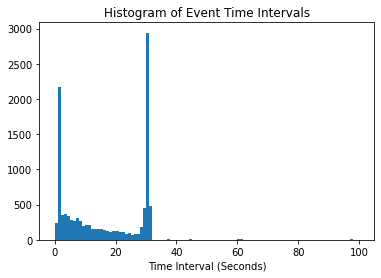

In [26]:
#  Histogram of heartbeat frequencies
plt.hist(
    data_df.date.diff() / np.timedelta64(1, 's'),
    range=[0, 100], 
    bins=100
)
plt.title('Histogram of Event Time Intervals')
plt.xlabel('Time Interval (Seconds)')

In [30]:
data_df.received

0        2021/08/18 13:43:21
1        2021/08/18 13:43:51
2        2021/08/18 13:43:59
3        2021/08/18 13:44:00
4        2021/08/18 13:44:00
                ...         
13469    2021/08/23 17:56:02
13470    2021/08/23 17:56:30
13471    2021/08/23 17:57:01
13472    2021/08/23 17:57:25
13473    2021/08/23 17:58:54
Name: received, Length: 13474, dtype: object

Text(0.5, 0, 'Time (Seconds)')

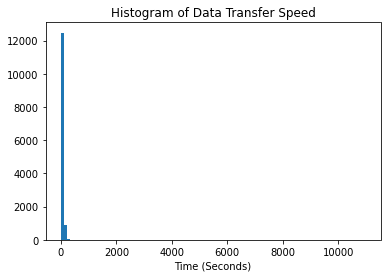

In [37]:
#  Histogram of GPS location frequencies
plt.hist(
    (data_df.received - data_df.date) / np.timedelta64(1, 's'),
    # range=[0, 100], 
    bins=100
)
plt.title('Histogram of Data Transfer Speed')
plt.xlabel('Time (Seconds)')

In [230]:
# Uniform sampling per vehicle/device